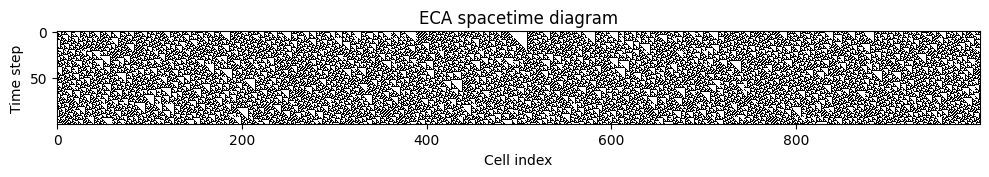

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def eca_step(state, rule):
    left  = np.roll(state, 1)
    right = np.roll(state, -1)
    code = (left << 2) | (state << 1) | right
    rule_bits = np.array([int(b) for b in np.binary_repr(rule, width=8)][::-1])
    return rule_bits[code]

def run_eca(rule, n, T, p, seed, init_state=None):
    if init_state is not None:
        state = np.array(init_state, dtype=int)
        n = len(state)
    else:
        rng = np.random.default_rng(seed)
        state = (rng.random(n) < p).astype(int)

    history = [state.copy()]
    for _ in range(T - 1):
        state = eca_step(state, rule)
        history.append(state.copy())
    return np.array(history)

def plot_eca(history):
    plt.figure(figsize=(10, 5))
    plt.imshow(history, cmap='Greys', interpolation='nearest')
    plt.xlabel("Cell index")
    plt.ylabel("Time step")
    plt.title("ECA spacetime diagram")
    plt.tight_layout()
    plt.show()

# ==== 你只需要这一段，选一种初始化方式 ====

# 方法1：随机初始
hist = run_eca(rule=60, n=1000, T=100, p=0.3, seed=42)
np.save("eca_rule60_hist.npy", hist)
# 方法2：自定义初始：
# init = [0]*5 + [1] + [0]*5 + [1] + [0]*20
# hist = run_eca(rule=184, T=40, init_state=init)

plot_eca(hist)